<a href="https://colab.research.google.com/github/siqisiqisiqisiqi/deep-learning-hw1/blob/main/hw1_1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install torchviz

  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4150 sha256=e392f67417b02bb0c815f03bac08f8901be62cc0f2036b3228b97a78633f9943
  Stored in directory: /root/.cache/pip/wheels/04/38/f5/dc4f85c3909051823df49901e72015d2d750bd26b086480ec2
Successfully built torchviz


In [ ]:
pip install hiddenlayer


In [ ]:
import torch
import torch.nn as nn
from torch.optim import SGD
import torch.utils.data as Data
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torchviz import make_dot
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import hiddenlayer as hl
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import math

In [ ]:
pi = math.pi
train_x = torch.arange(1e-4,1,0.001)
train_x = train_x.numpy()
num = np.size(train_x)
train_y = np.sin(5*pi*train_x)/(5*pi*train_x)
train_x = train_x.reshape(num,1)
train_y = train_y.reshape(num,)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    train_x, train_y, test_size=0.1, random_state=123
)
 
scales = MinMaxScaler(feature_range=(0, 1))
X_train_s=  X_train
X_test_s=X_test
 
X_train_s = torch.from_numpy(X_train_s.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
X_test_s = torch.from_numpy(X_test_s.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))
 
train_data = Data.TensorDataset(X_train_s, y_train)
test_data = Data.TensorDataset(X_test_s,y_test)
 


In [ ]:
train_loader = Data.DataLoader(
    dataset=train_data,  
    batch_size=len(train_data),
    shuffle = True
)
 
test_loader = Data.DataLoader(
    dataset=test_data, 
    batch_size=len(test_data),
    shuffle = True
)

In [ ]:
def weights_init(m):
    if isinstance(m, nn.Conv2d):
        torch.nn.init.xavier_uniform(m.weight.data)

In [ ]:
def count_parameters(model):
  return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [ ]:
class model_0(nn.Module):
  def __init__(self):
    super(model_0, self).__init__()
    self.flatten = nn.Flatten()
    self.linear_relu_stack = nn.Sequential(
        nn.Linear(1,5),
        nn.ReLU(),
        nn.Linear(5,10),
        nn.ReLU(),
        nn.Linear(10,10),
        nn.ReLU(),
        nn.Linear(10,10),
        nn.ReLU(),
        nn.Linear(10,10),
        nn.ReLU(),
        nn.Linear(10,10),
        nn.ReLU(),
        nn.Linear(10,5),
        nn.ReLU(),
        nn.Linear(5,1),
    )
  def forward(self, x):
    x = self.flatten(x)
    logits = self.linear_relu_stack(x)
    return logits

In [ ]:
class model_1(nn.Module):
  def __init__(self):
    super(model_1, self).__init__()
    self.flatten = nn.Flatten()
    self.linear_relu_stack = nn.Sequential(
        nn.Linear(1,10),
        nn.ReLU(),
        nn.Linear(10,18),
        nn.ReLU(),
        nn.Linear(18,15),
        nn.ReLU(),
        nn.Linear(15,4),
        nn.ReLU(),
        nn.Linear(4,1),
    )
  def forward(self, x):
    x = self.flatten(x)
    logits = self.linear_relu_stack(x)
    return logits

In [ ]:
class model_2(nn.Module):
  def __init__(self):
    super(model_2, self).__init__()
    self.flatten = nn.Flatten()
    self.linear_relu_stack = nn.Sequential(
        nn.Linear(1,190),
        nn.ReLU(),
        nn.Linear(190,1),
    )
  def forward(self, x):
    x = self.flatten(x)
    logits = self.linear_relu_stack(x)
    return logits

In [ ]:
mlp0 = model_0()
lr_0 = 1e-4

mlp1 = model_1()
lr_1 = 1e-3

mlp2 = model_2()
lr_2 = 1e-4

# num = count_parameters(mlp1)
# print(num)

In [ ]:
# optimizer
optimizer0 = torch.optim.Adam(mlp0.parameters(), lr=lr_0)
optimizer1 = torch.optim.Adam(mlp1.parameters(), lr=lr_1)
optimizer2 = torch.optim.Adam(mlp2.parameters(), lr=lr_2)

loss_func = nn.MSELoss()  

train_loss_all_0 = []
train_loss_all_1 = []
train_loss_all_2 = []

history1 = hl.History()
epochs = 20000

canvas1 = hl.Canvas()
print_step = 100
 
 
for epoch in range(epochs):
  for step, (b_x, b_y) in enumerate(train_loader):
    output0 = mlp0(b_x)  
    output1 = mlp1(b_x)
    output2 = mlp2(b_x)

    b_y = b_y.reshape(len(b_y),1)
    train_loss_0 = loss_func(output0, b_y)  
    train_loss_1 = loss_func(output1, b_y) 
    train_loss_2 = loss_func(output2, b_y)   

    optimizer0.zero_grad()  
    optimizer1.zero_grad()  
    optimizer2.zero_grad()  

    train_loss_0.backward()  
    train_loss_1.backward()  
    train_loss_2.backward() 

    optimizer0.step()  
    train_loss_all_0.append(train_loss_0.item())
    optimizer1.step()  
    train_loss_all_1.append(train_loss_1.item())
    optimizer2.step()  
    train_loss_all_2.append(train_loss_2.item())

    # niter = epoch*len(train_loader)+step+1

  # if niter % print_step == 0:
  #   output1 = mlp1(X_test_s)

  #   y_test=y_test.reshape(len(y_test),1)
  #   test_loss = loss_func(output1,y_test)
  #   # print(test_loss)
  #   history1.log(niter, test_loss=test_loss )

  #   with canvas1:
  #     canvas1.draw_plot(history1["test_loss"])

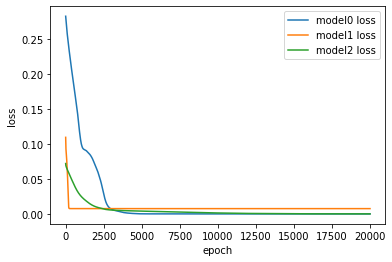

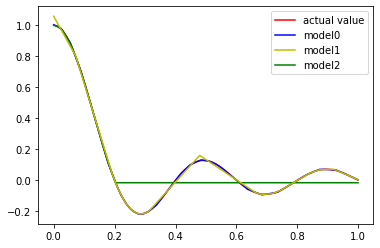

In [ ]:
plt.figure()
p0, = plt.plot(train_loss_all_0)
p1, = plt.plot(train_loss_all_1)
p2, = plt.plot(train_loss_all_2)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend([p0,p1,p2],["model0 loss","model1 loss","model2 loss"])


##################################################-------------------#########################################


plt.figure()
x = np.arange(1e-4,1,0.002)
x = x.reshape(len(x), 1)
y = np.sin(5*pi*x)/(5*pi*x)
p, = plt.plot(x,y,'r-')

x0 = np.arange(1e-4,1,0.001)
x0 = x0.reshape(len(x0), 1)
x0 = torch.from_numpy(x0.astype(np.float32))

y0 = mlp0(x0)
x0 = x0.numpy()
y0 = y0.detach().numpy()

p0, = plt.plot(x0,y0,'b-')

x1 = np.arange(1e-4,1,0.001)
x1 = x1.reshape(len(x1), 1)
x1 = torch.from_numpy(x1.astype(np.float32))

y1 = mlp1(x1)
x1 = x1.numpy()
y1 = y1.detach().numpy()

p1, = plt.plot(x1,y1,'g-')

x2 = np.arange(1e-4,1,0.001)
x2 = x2.reshape(len(x2), 1)
x2 = torch.from_numpy(x2.astype(np.float32))

y2 = mlp2(x2)
x2 = x2.numpy()
y2 = y2.detach().numpy()

p2, = plt.plot(x2,y2,'y-')

plt.legend([p, p0, p2, p1],["actual value","model0","model1","model2"])

plt.show()


In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive/')
PATH = './drive/MyDrive/Colab Notebooks/model.pth'
# torch.save(mlp0,PATH)
torch.save(mlp1,PATH)
# torch.save(mlp2,PATH)